# Submit job on Nersc

[**Common slurm commands**](https://github.com/NERSC/slurm-magic), such as **_%sbatch, %squeue, %scancel, %salloc, %srun, %scontrol_**

Any command that works at the command-line can be used in Jupyter Notebook by prefixing it with the **! ** character. For example, the **ls, pwd, and echo** commands can be run as follows: **!ls, !pwd, !echo** ([link](https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html))

Besides **%cd**, other available shell-like magic functions are **%cat, %cp, %env, %ls, %man, %mkdir, %more, %mv, %pwd, %rm, and %rmdir**, any of which can be used without the % sign if `automagic` is on.

In [13]:
%matplotlib inline
import subprocess
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## Sample batch script

**on Edison**

```bash
#!/bin/bash -l

#SBATCH -A m1800
#SBATCH -N 171
#SBATCH -t 48:00:00
#SBATCH -L SCRATCH  
#SBATCH -J 100x2_1w
#SBATCH --qos regular
#SBATCH --mail-type ALL
#SBATCH --mail-user pin.shuai@pnnl.gov

cd $SLURM_SUBMIT_DIR

srun -n 4096 /global/project/projectdirs/pflotran/pflotran-edison/src/pflotran/pflotran -pflotranin pflotran_100x100x2_1w_bc.in
```

**on Cori**



```bash
#!/bin/bash -l

#SBATCH -A m1800
#SBATCH -N 171
#SBATCH -t 48:00:00
#SBATCH -L SCRATCH  
#SBATCH -J 100x2_1w
#SBATCH --qos regular
#SBATCH --mail-type ALL
#SBATCH --mail-user pin.shuai@pnnl.gov
#SBATCH -C haswell

cd $SLURM_SUBMIT_DIR

srun -n 4096 /global/project/projectdirs/pflotran/pflotran-cori/src/pflotran/pflotran -pflotranin pflotran_100x100x2_1w_bc.in
```

## execute batch job

In [1]:
cd /global/cscratch1/sd/pshuai/John_case/

/global/cscratch1/sd/pshuai


In [13]:
%sbatch run.debug.sh

'Submitted batch job 13162214\n'

In [19]:
%squeue -u pshuai

,JOBID,PARTITION,NAME,USER,ST,TIME,NODES,NODELIST(REASON)


In [18]:
%scancel 13162214

''

## execute interactive job

In [16]:
%salloc -N 1 -q debug -C haswell -t 00:30:00 -L SCRATCH

('',
 'Launched in background. Redirecting stdin to /dev/null\nsalloc: Pending job allocation 12123294\nsalloc: job 12123294 queued and waiting for resources\nsalloc: job 12123294 has been allocated resources\nsalloc: Granted job allocation 12123294\nsrun: error: ioctl(TIOCGWINSZ): Inappropriate ioctl for device\nsrun: error: Not using a pseudo-terminal, disregarding --pty option\nsalloc: Relinquishing job allocation 12123294\n')

In [18]:
%srun -n 32 ../pflotran-cori-flux -pflotranin pflotran.in

('',
 'Launched in background. Redirecting stdin to /dev/null\nsrun: error: No hardware architecture specified (-C)!\nsrun: error: Unable to allocate resources: Unspecified error\n')

In [19]:
%squeue -u pshuai

,JOBID,PARTITION,NAME,USER,ST,TIME,NODES,NODELIST(REASON)


In [27]:
!sh /global/cscratch1/sd/pshuai/test/test.sh

hello world! 


In [30]:
!cat /global/cscratch1/sd/pshuai/test/test.sh

#!/bin/bash -l

 printf "hello world! \n"




# scaling test

Scaling test is run as follows:
* increase the # of cores while specifying `MAX_STEPS = 50` in PFLOTRAN input deck. 
* run interactive job using sample code below
* plot `FLOW TS BE SNES time` and `TRANSPORT TS BE SNES time` over the # of cores

```bash
switch ( "$NERSC_HOST" )
# used 'srun -n # ./a.out'
case cori:
  alias q1    'salloc -N 1 -q debug -C haswell -t 00:30:00 -L SCRATCH'
                srun -n 1 ../pflotran-cori -pflotranin pflotran_100x100x05_6h_bc.in
  alias q2    'salloc -N 1 -q debug -C haswell -t 00:30:00 -L SCRATCH'
  alias q4    'salloc -N 1 -q debug -C haswell -t 00:30:00 -L SCRATCH'
  alias q8    'salloc -N 1 -q debug -C haswell -t 00:30:00 -L SCRATCH'
  alias q16    'salloc -N 1 -q debug -C haswell -t 00:30:00 -L SCRATCH'
  alias q32    'salloc -N 1 -q debug -C haswell -t 00:30:00 -L SCRATCH'
                srun -n 32 ../pflotran-cori -pflotranin pflotran_100x100x05_6h_bc.in
  alias q64    'salloc -N 2 -q debug -C haswell -t 00:30:00 -L SCRATCH'
                srun -n 64 ../pflotran-cori -pflotranin pflotran_100x100x05_6h_bc.in
  alias q128    'salloc -N 4 -q debug -C haswell -t 00:30:00 -L SCRATCH'
  alias q256    'salloc -N 8 -q debug -C haswell -t 00:30:00 -L SCRATCH'
  alias q512    'salloc -N 16 -q debug -C haswell -t 00:30:00 -L SCRATCH'
  alias q1024    'salloc -N 32 -q debug -C haswell -t 00:30:00 -L SCRATCH'
  alias q2048    'salloc -N 64 -q debug -C haswell -t 00:30:00 -L SCRATCH'
  breaksw
    
case edison:
  alias q1    'salloc -N 1 -q debug -t 00:30:00 -L SCRATCH'
                srun -n 1 ../pflotran-edison -pflotranin pflotran_100x100x2_6h_bc.in
  alias q4    'salloc -N 1 -q debug -t 00:30:00 -L SCRATCH'
                srun -n 4 ../pflotran-edison -pflotranin pflotran_200x200x2_6h_bc_new_iniH.in
  alias q8    'salloc -N 1 -q debug -t 00:30:00 -L SCRATCH'
                srun -n 8 ../pflotran-edison -pflotranin pflotran_1000x1000x5_6h_bc.in
  alias q16   'salloc -N 1 -q debug -t 00:30:00 -L SCRATCH'
                srun -n 16 ../pflotran-edison -pflotranin pflotran_100x100x05_6h_bc.in
  alias q32   'salloc -N 2 -q debug -t 00:30:00 -L SCRATCH'
                srun -n 32 ../pflotran-edison -pflotranin pflotran_1000x1000x5_6h_bc.in
  alias q64   'salloc -N 3 -q debug -t 00:30:00 -L SCRATCH'
                srun -n 64 ../pflotran-edison -pflotranin pflotran_1000x1000x5_6h_bc.in
  alias q128  'salloc -N 6 -q debug -t 00:30:00 -L SCRATCH'
                srun -n 128 ../pflotran-edison -pflotranin pflotran_200x200x2_6h_bc_new_iniH.in
  alias q256  'salloc -N 11 -q debug -t 00:30:00 -L SCRATCH'
                srun -n 256 ../pflotran-edison -pflotranin pflotran_1000x1000x5_6h_bc.in
  alias q512  'salloc -N 22 -q debug -t 00:30:00 -L SCRATCH'
                srun -n 512 ../pflotran-edison -pflotranin pflotran_1000x1000x5_6h_bc.in
  alias q1024  'salloc -N 44 -q debug -t 00:30:00 -L SCRATCH'
                srun -n 1024 ../pflotran-edison -pflotranin pflotran_1000x1000x5_6h_bc.in
  alias q2048 'salloc -N 86 -q debug -t 00:30:00 -L SCRATCH'
                srun -n 2048 ../pflotran-edison -pflotranin pflotran_1000x1000x5_6h_bc.in
  alias q4096 'salloc -N 171 -q debug -t 00:30:00 -L SCRATCH'
  alias q8192 'salloc -N 342 -q debug -t 00:30:00 -L SCRATCH'
  breaksw
endsw
```

## scaling test for HFR_model_1000x1000x5_6h_bc

**Scaling test results for model resolution of 1000x1000x5 m with a total of 144,000 grids and `Max step = 500`. **

|# of cores|Flow solution time (sec)|Transport solution time (sec)|Wall clock time (sec)|
|----------|------------------|-----------------------|---------------|
|4|556|98.9|802|
|8|720.3|67.9|900.3|
|16|411.3|38.5|556.4|
|32|223.1|17.3|324.7|
|64|165.9|10.4|257.4|
|128|133.9|5.1|215.1|
|**256**|**90.6**|**2.4**|**168.9**|
|512|136.5|1.5|214.3|
|1024|112.3|1.6|200.4|
|2048|408.1|2.4|502|

plot simulation time vs. # of cores

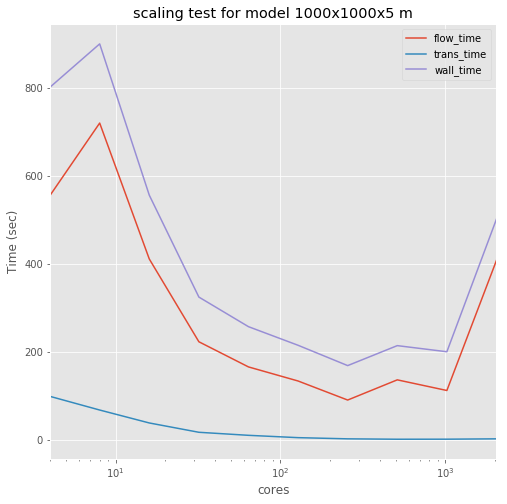

In [23]:
d = {'cores' : [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048],
    'flow_time': [556, 720.3, 411.3, 223.1, 165.9, 133.9, 90.6, 136.5, 112.3, 408.1],
    'trans_time': [98.9, 67.9, 38.5, 17.3, 10.4, 5.1, 2.4, 1.5, 1.6, 2.4],
    'wall_time' : [802, 900.3, 556.4, 324.7, 257.4, 215.1, 168.9, 214.3, 200.4, 502]}
df = pd.DataFrame(data= d)

matplotlib.style.use('ggplot')

fig, ax = plt.subplots(1, 1)
df.plot(x='cores', y= ['flow_time', 'trans_time', 'wall_time'], ax=ax, figsize=(8, 8), logx=True)
ax.set_ylabel('Time (sec)')
ax.set_title('scaling test for model 1000x1000x5 m')

## scaling test for 200x200x2_head_bc_new_iniH model

`MAX_STEPS 100` for testing model of 200x200x2m with 9 million grids

|dof per core|# of cores|Flow solution time (sec)|Transport solution time (sec)|Wall clock time (sec)|Total Wall clock time (hr)$^*$|
|---|----------|------------------|-----------------------|---------------|---|
|70312|128|841|37.1|1260|
|35156|256|359.4|22.4|733.6|
|17578|512|220.3|12|585.4|
|8789|1024|86.9|6|445|
|**4394**|**2048**|**47.8**|**2.5**|**520**|**67.25**|
|2197|4096|42.1|1.6|465|

*total wall clock time is the time required to finish one simulation

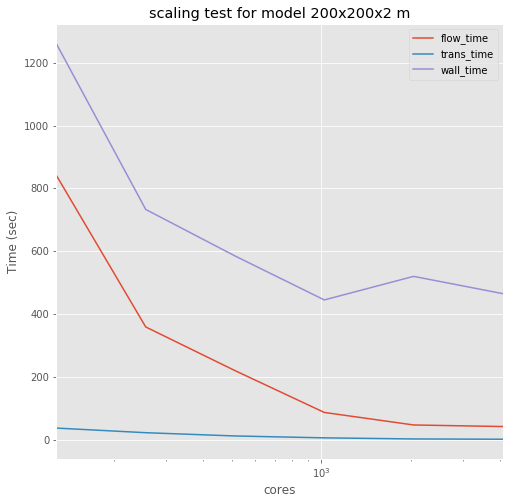

In [24]:
d = {'cores' : [ 128, 256, 512, 1024, 2048, 4096],
    'flow_time': [841, 359, 220, 86.9, 47, 42],
    'trans_time': [37.1, 22.4, 12, 6, 2.5, 1.6],
    'wall_time' : [1260, 733, 585, 445, 520, 465]}
df = pd.DataFrame(data= d)

matplotlib.style.use('ggplot')

fig, ax = plt.subplots(1, 1)
df.plot(x='cores', y= ['flow_time', 'trans_time', 'wall_time'], ax=ax, figsize=(8, 8), logx=True)
ax.set_ylabel('Time (sec)')
ax.set_title('scaling test for model 200x200x2 m')

## scaling test for 100x100x2 m

`MAX_STEPS 100` for testing model of 100x100x2 m with 18 million grids

|dof per core|# of cores|Flow solution time (sec)|Transport solution time (sec)|Wall clock time (sec)|Total wall time (hr)|
|---|----------|------------------|-----------------------|---------------|---|
|17578|1024|206.2|21.2|668|
|8789|2048|104.1|11.2|474.3|
|**4394**|**4096**|**59.4**|**4.6**|**450.5**|**109.2**|
|2197|8192|68.9|3.6|548.1|

## scaling test for 100x100x1 m


`MAX_STEPS 100` for testing model of 100x100x1 m with 36 million grids

|dof per core|# of cores|Flow solution time (sec)|Transport solution time (sec)|Wall clock time (sec)|
|---|----------|------------------|-----------------------|---------------|
|35156|1024|729|43|1130|
|17578|2048| 315 | 21 | 700 |
|8789|4096| 189 | 10 | 645 |
|4394|8192|115|5.6|649|

## scaling test for 100x100x0.5 m 

`MAX_STEPS 100` for testing model of 100x100x0.5 m with 72 million grids

|dof per core|# of cores|Flow solution time (sec)|Transport solution time (sec)|Wall clock time (sec)|
|---|----------|------------------|-----------------------|---------------|
|35156|2048|765.7|42.7|1228.2|
|17578|4096|327.1|19.8|787.5|
|8789|8192|189.7|10.2|739|
|4394|16384|

# job logs

|Completed jobs|Description|Total run time (hr)
|:---|:---:|:---:|
|HFR_model_200x200x2_6h_bc|200x200x2-m grid, **6h-river-bc**, no-flow-inland-bc, 200-m-thick|
HFR_model_200x200x2_1w_bc|200x200x2-m grid, **1w-river-bc**, no-flow-inland-bc, 200-m-thick
HFR_model_200x200x5_6h_1w_bc|200x200x5-m grid, **both 6h- and 1w-river-bc**, no-flow-inland-bc, 200-m-thick
HFR_model_100x100x5_6h_bc|100x100x5-m grid, 6h-river-bc, no-flow-inland-bc, 200-m-thick
HFR_model_1000x1000x5_6h_bc|1000x1000x5-m grid, 6h-river-bc, no-flow-inland-bc, 200-m-thick
HFR_model_200x200x2_head_bc_new_iniH|200x200x2-m grid, 6h-river-bc, **flow-inland-bc**, 200-m-thick
HFR_model_100x100x2|100x100x2-m grid, 6h-river-bc, no-flow-inland-bc, **100-m-thick**, iniH from MASS1 pts
HFR_model_200x200x2_6h_bc_new_iniH|iniH from MASS1 pts
HFR_model_100x100x2_new_iniH|**iniH from 200m-model output**, has basalt unit, 6h-river-bc
HFR_model_100x100x2_1w_bc|iniH from 200m-model output, has basalt unit, 1w-river-bc
HFR_model_100x100x2_cyclic|use restart file from **HFR_model_100x100x2_new_iniH** and run it for another 8 yrs| 105 
HFR_model_100x100x2_1w_cyclic|use restart file from **HFR_model_100x100x2_1w_bc** and run it for another 8 yrs

\* indicates model in progress